### 从回归到多类分类
回归是单数值输出,分类通常是多个输出
#### 均方损失
对类别进行一位有效编码,使用均方损失训练,最大值最为预测

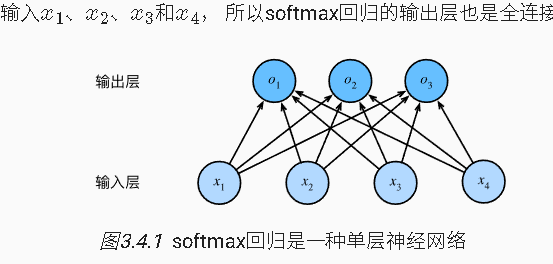
#### 最大似然估计补充知识
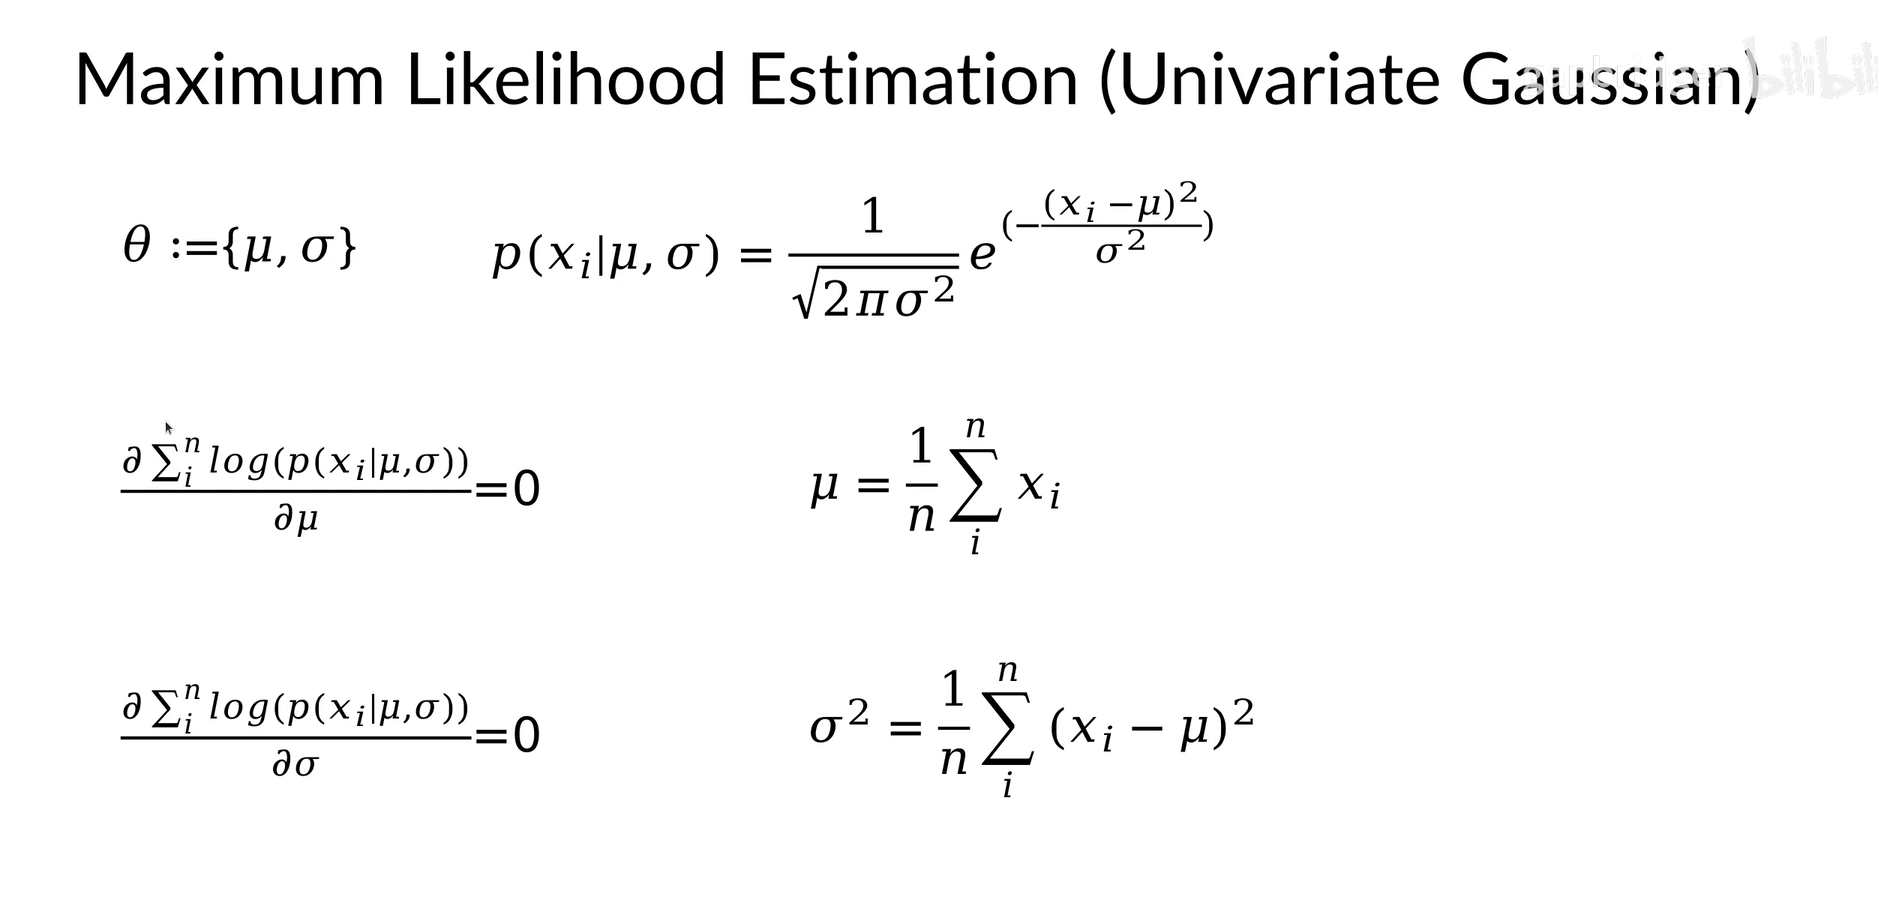
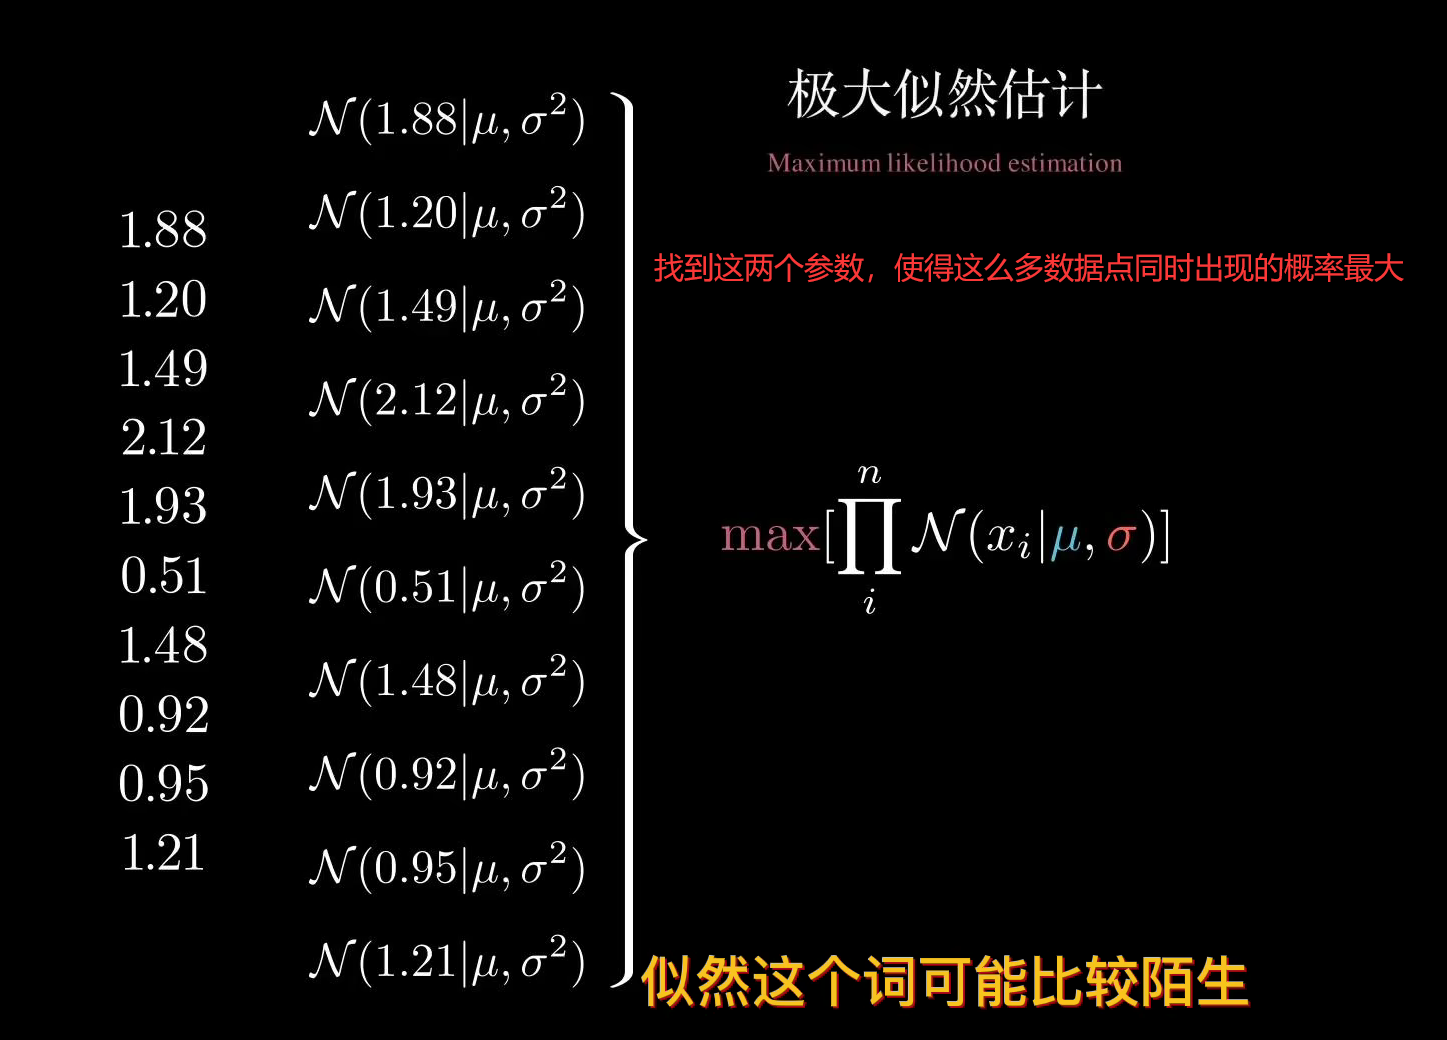
取对数操作,求对数似然的最大值
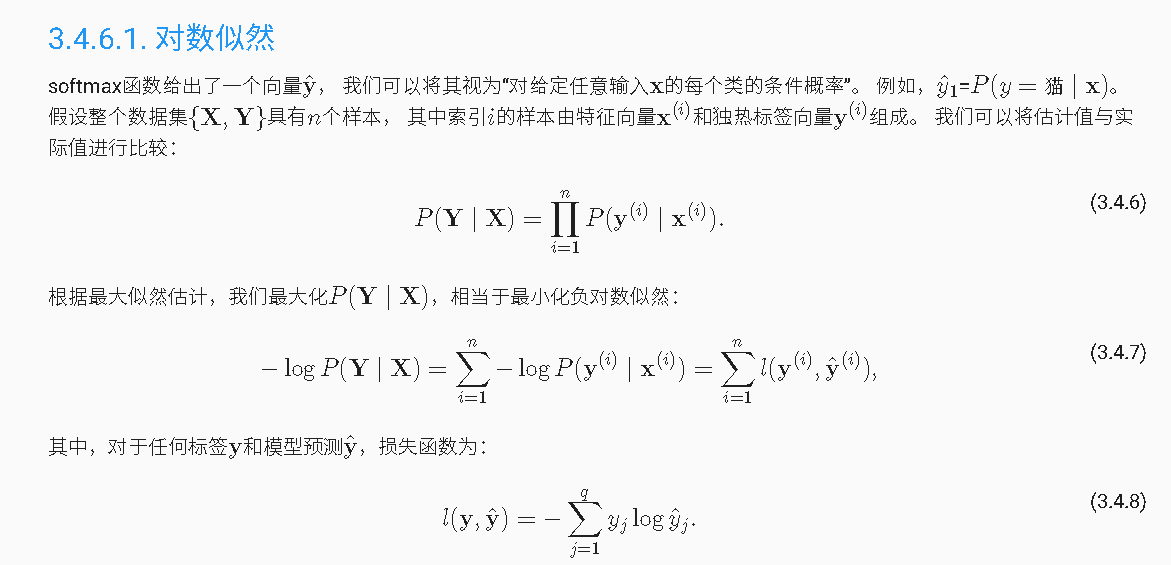
### 损失函数
#### 均方损失
#### 绝对值损失
#### Huber`s Robust Loss

### 图像分类数据集
MNIST数据集是图像分类中广泛使用的数据集之一,但作为基准数据集过于简单,我们采用更复杂的Fashion-MNIST数据集


Figure(972x216)
[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:>]]
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:>]
i: 0
ax,img: AxesSubplot(0.125,0.536818;0.0731132x0.343182) tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.00

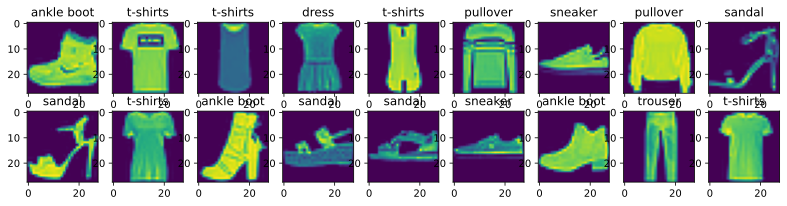

In [1]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

#通过框架中的内置函数将数据集下载并且读取到内存中
trans=transforms.ToTensor()
mnist_train=torchvision.datasets.FashionMNIST(root="../data",train=True,transform=trans,download=True)
mnist_test=torchvision.datasets.FashionMNIST(root="../data",train=False,transform=trans,download=True)

len(mnist_train),len(mnist_test)

def get_fashion_mnist_labels(labels):
    text_labels=['t-shirts','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs,num_rows,num_cols,titles=None,scale=1.5):
    figsize=(num_cols*scale,num_rows*scale)
    _, axes = d2l.plt.subplots(num_rows,num_cols,figsize=figsize)
    print(_)
    print(axes) # axes 为构建的两行九列的画布
    axes = axes.flatten()
    print(axes) # axes 变成一维数据
    for i,(ax,img) in enumerate(zip(axes,imgs)):
        if(i<1):
            print("i:",i)
            print("ax,img:",ax,img)
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
            ax.set_title(titles[i])
        else:
            # PIL图片
            ax.imshow(img)
            
X, y = next(iter(data.DataLoader(mnist_train,batch_size=18))) # X，y 为仅抽取一次的18个样本的图片、以及对应的标签值
show_images(X.reshape(18,28,28),2,9,titles=get_fashion_mnist_labels(y))

In [9]:
batch_size=256

def get_dataloader_workers():
    return 4
train_iter=data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_workers())
timer=d2l.Timer()
for X,y in train_iter:
    continue
f'{timer.stop():.2f}sec'


def load_data_fashion_mnist(batch_size, resize=None):
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize)) # 如果有Resize参数传进来，就进行resize操作
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=True,transform=trans,download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST",train=False,transform=trans,download=True)            
    return (data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()),
           data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()))  

'6.86sec'

### softmax回归的从零开始实现

In [ ]:
import torch
from IPython import display
from d2l import torch as d2l

#每一次随机读取256张图片
batch_size=256
#返回训练集和测试集的迭代器
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)

#将展平每个图像,将他们视为长度为784的向量,因为我们数据集有十个类别,所以网络输出维度为10
num_inputs=784
num_outputs=10

W=torch.normal(0,0.01,size=(num_inputs,num_outputs),requires_grad=True)
#偏移是一个长度为10的向量
b=torch.zeros(num_outputs,requires_grad=True)

#实现softmax
def softmax(X):
    X_exp=torch.exp(X)
    partition=X_exp.sum(1,keepdim=True)
    return X_exp/partition
